In [42]:
import pandas as pd
import numpy as np
XXX = pd.read_csv("DimPatientCoded.csv"
                 )
XXX

,Unnamed: 0,Date Announced,Age Bracket,Age,Gender,Detected State,PovertyRate,Current Status,Type of trans,Nationality,Symptoms,JobLoss,FinancialSituation,Diseases,Profession,CovidAfterVaccin,Vaccinated,Reason
0,0,1/30/2020,0,1.0,0,16,7.05,1,1,India,1,2,1,4,1,0,1,0.0
1,1,2/2/2020,0,1.0,1,16,7.05,1,1,India,5,0,0,4,2,1,1,0.0
2,2,2/3/2020,0,1.0,1,16,7.05,1,1,India,1,2,1,4,1,0,1,0.0
3,3,3/2/2020,0,1.0,1,8,9.91,1,1,India,2,2,0,2,1,0,0,2.0
4,4,3/2/2020,0,1.0,1,31,13.74,1,1,India,2,0,1,4,2,0,0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247231,247231,8/6/2020,0,1.0,1,15,20.91,1,0,India,2,2,0,4,1,1,1,0.0
247232,247232,8/6/2020,0,1.0,1,15,20.91,1,0,India,5,2,0,2,1,0,0,5.0
247233,247233,8/6/2020,0,1.0,1,15,20.91,1,0,India,5,0,1,2,2,0,0,2.0
247234,247234,8/6/2020,0,1.0,1,15,20.91,1,0,India,5,0,1,2,2,0,1,0.0


In [53]:
XX =  XXX[['Current Status','FinancialSituation','Diseases','JobLoss']]
dataset = XX.replace(np.nan,0)
dataset

,Current Status,FinancialSituation,Diseases,JobLoss
0,1,1,4,2
1,1,0,4,0
2,1,1,4,2
3,1,0,2,2
4,1,1,4,0
...,...,...,...,...
247231,1,0,4,2
247232,1,0,2,2
247233,1,1,2,0
247234,1,1,2,0


In [54]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [55]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 3].values

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)


In [57]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [66]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=10)
classifier.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=10)

In [67]:
y_pred = classifier.predict(X_test)

In [64]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))



[[13822  5036  3884     0]
 [ 6143  7789   924   311]
 [ 4815  2257  2941     0]
 [    0   929     0   597]]
              precision    recall  f1-score   support

           0       0.56      0.61      0.58     22742
           1       0.49      0.51      0.50     15167
           2       0.38      0.29      0.33     10013
           3       0.66      0.39      0.49      1526

    accuracy                           0.51     49448
   macro avg       0.52      0.45      0.48     49448
weighted avg       0.50      0.51      0.50     49448



In [13]:
error = []
# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
      

KeyboardInterrupt: 

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')


In [269]:
from sklearn.neighbors import KNeighborsClassifier

#Setup arrays to store training and test accuracies
neighbors = np.arange(1,40)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
#Compute accuracy on the training set
for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    
    test_accuracy[i] = knn.score(X_test, y_test) 

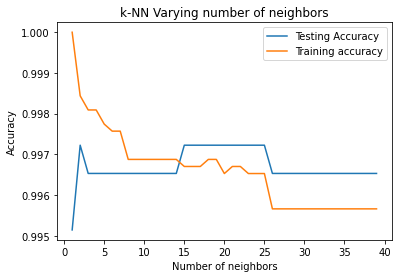

In [270]:
#Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()
  

In [65]:
knn.score(X_test, y_test)

0.44375910046917977